In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Flight Price

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [5]:
flight_df = pd.read_excel(r"D:\Study\Data Science\Datasets\flight_price.xlsx")

In [6]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
flight_df.shape

(10683, 11)

- 10683 rows and 11 columns

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

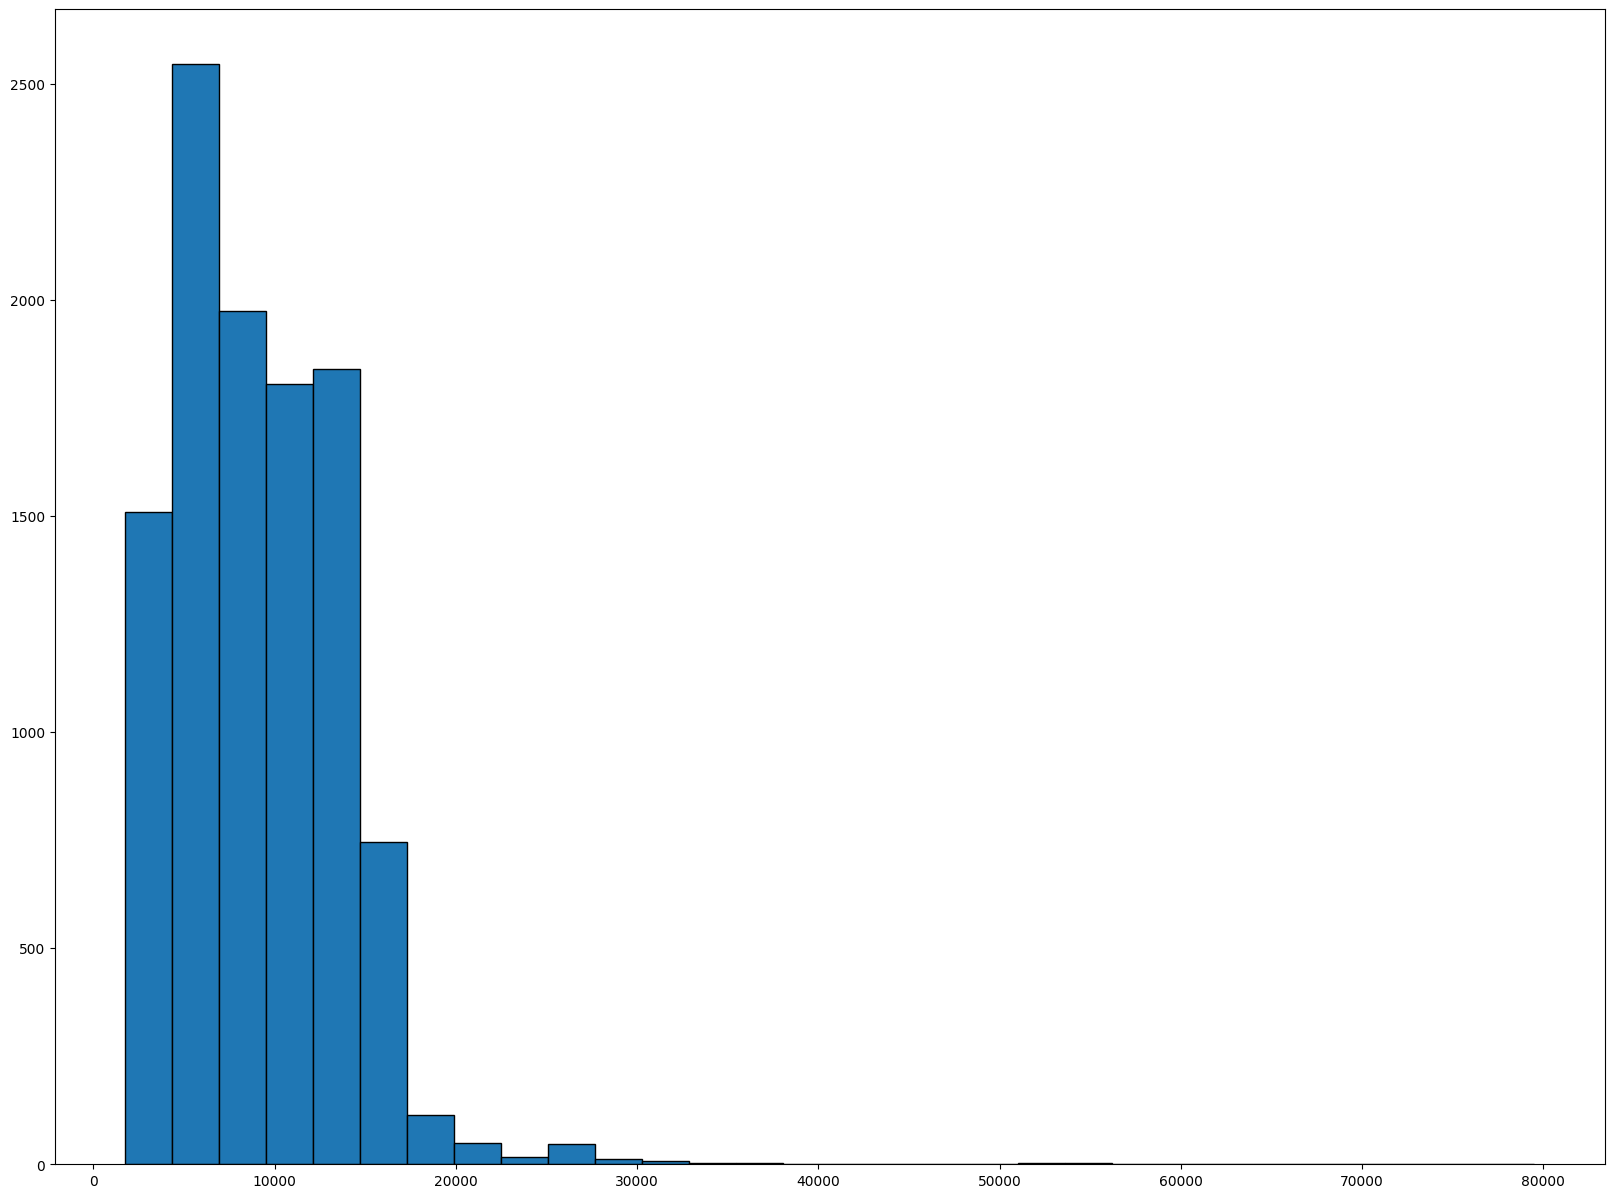

In [14]:
plt.figure(figsize=(20,15))
# sns.displot(flight_df['Price'],bins=30)
plt.hist(flight_df['Price'],bins=30,edgecolor='black')
plt.show()

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [17]:
print('Maximum Price :',flight_df['Price'].max())
print('Minimum Price :',flight_df['Price'].min())

Maximum Price : 79512
Minimum Price : 1759


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

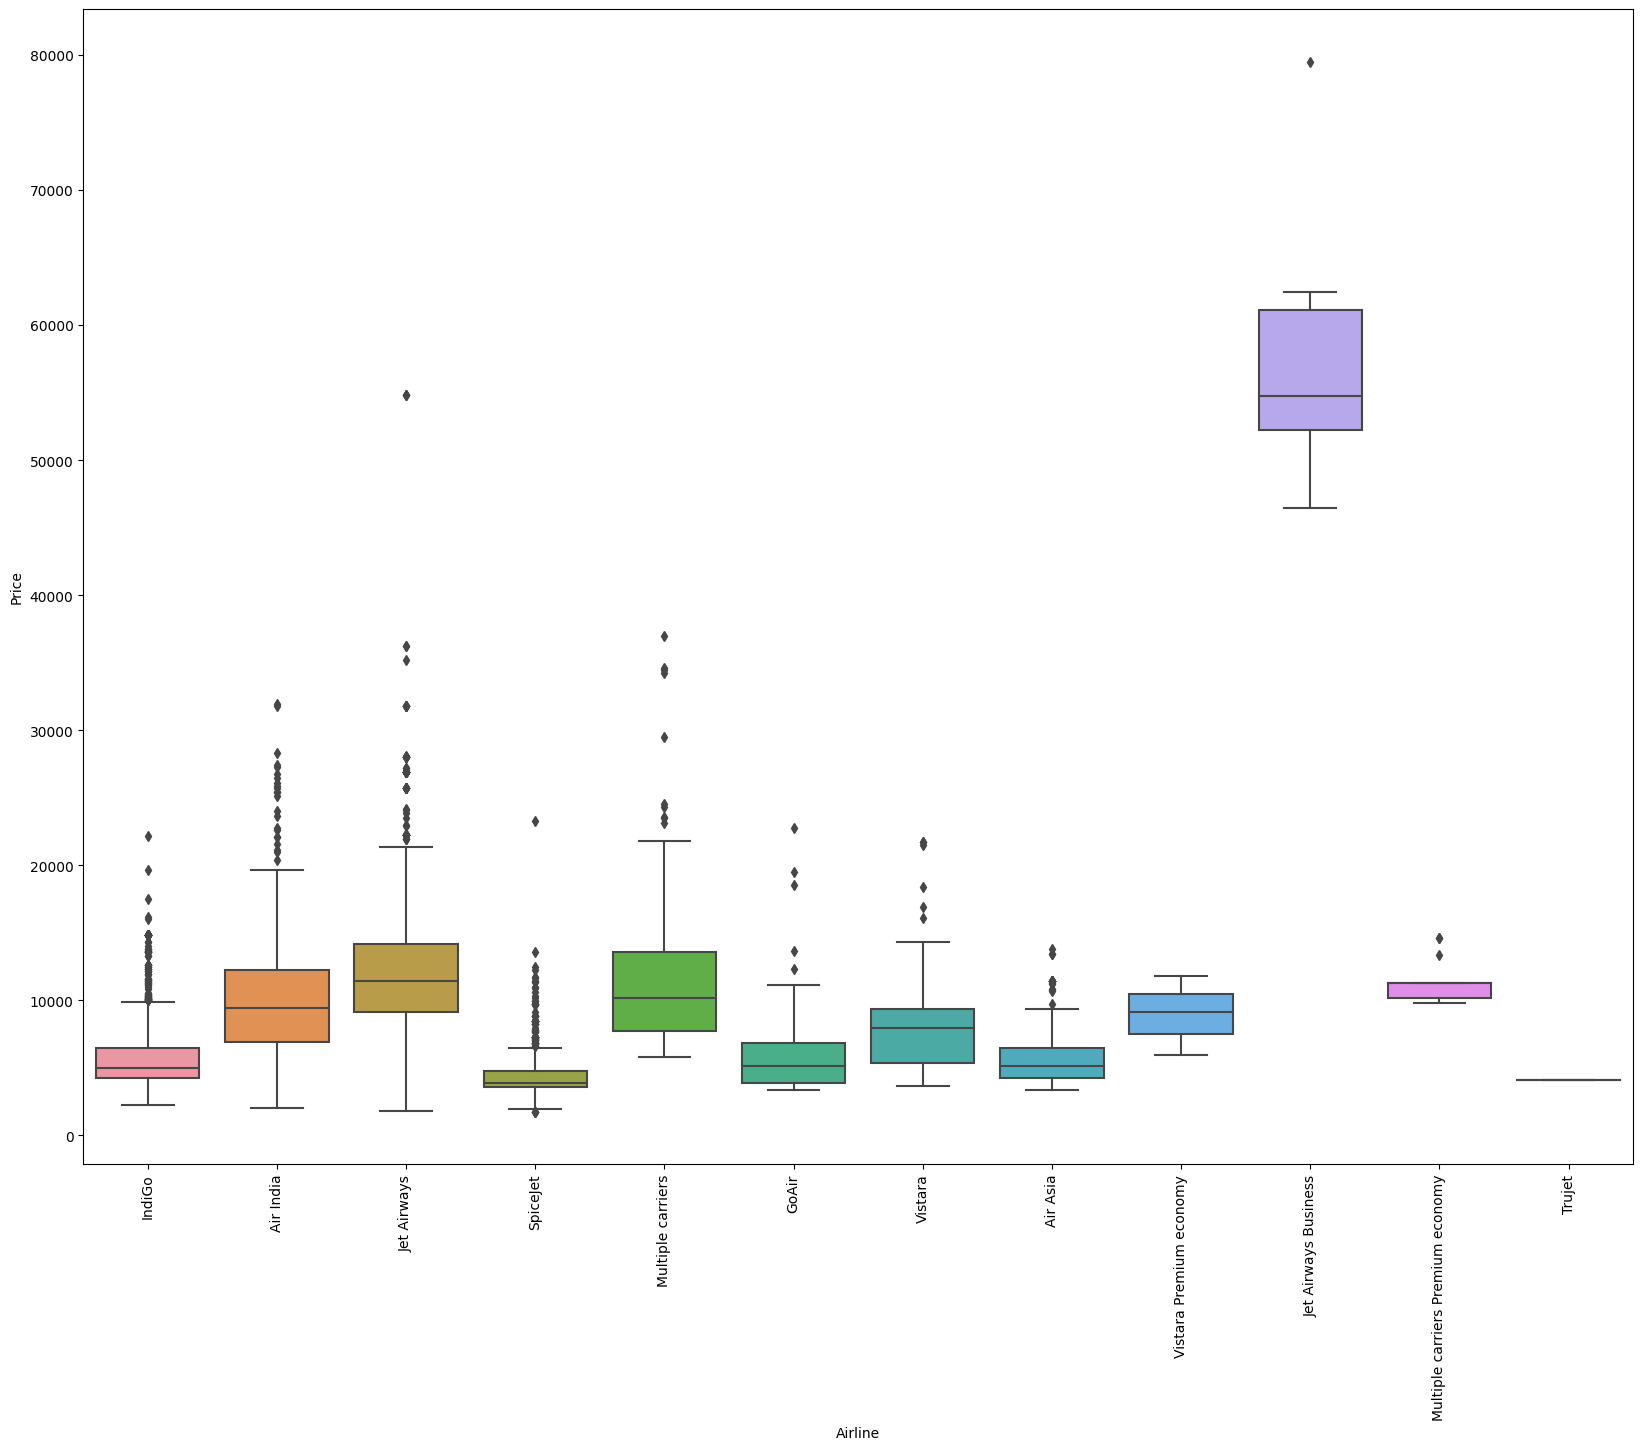

In [27]:
plt.figure(figsize=(20,15))
sns.boxplot(data=flight_df,x='Airline',y='Price')
plt.xticks(rotation='vertical')
plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

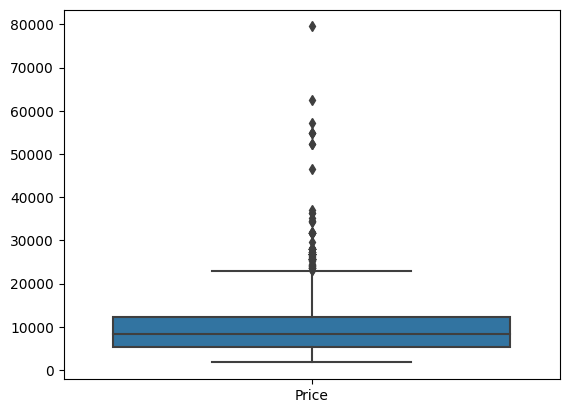

In [34]:
sns.boxplot(data=flight_df)
plt.show()

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

for that we have to convert Date_of_Journey into numeric values

In [42]:
flight_df['Day'] = flight_df['Date_of_Journey'].str.split('/').str[0]
flight_df['Month'] = flight_df['Date_of_Journey'].str.split('/').str[1]
flight_df['Year'] = flight_df['Date_of_Journey'].str.split('/').str[2]

flight_df['Day'] = flight_df['Day'].astype(int)
flight_df['Month'] = flight_df['Month'].astype(int)
flight_df['Year'] = flight_df['Year'].astype(int)

In [43]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


Now we can find that in which month is peak travel month (same for season)

In [62]:
temp_df = flight_df.groupby('Month')['Price'].count().reset_index()

In [66]:
temp_df = temp_df.rename(columns={'Price':'total_flights'})

In [67]:
temp_df

,Month,total_flights
0,3,2724
1,4,1079
2,5,3466
3,6,3414


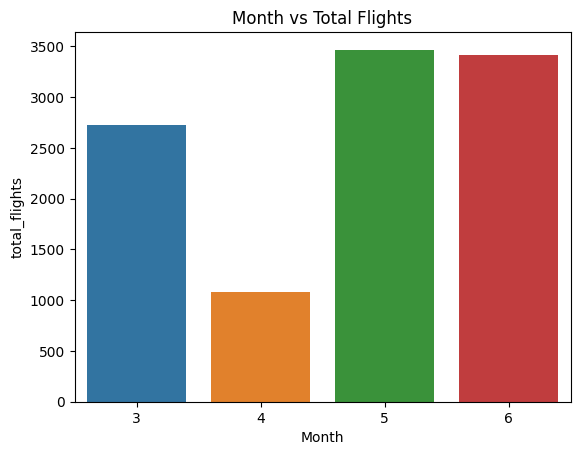

In [69]:
plt.title('Month vs Total Flights')
sns.barplot(data=temp_df,x='Month',y='total_flights')
plt.show()

- So we can conclude that month 5 and 6 are peak month 

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

In [71]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [76]:
flight_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [77]:
flight_df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [78]:
flight_df['Total_Stops'] = flight_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [79]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
dtype: int64

In [80]:
flight_df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: xlabel='Total_Stops', ylabel='Price'>

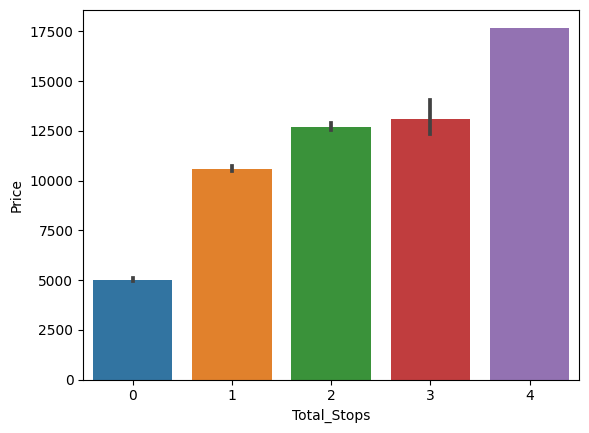

In [81]:
sns.barplot(data=flight_df,x='Total_Stops',y='Price')

- from this we can conclude that total_stops is directly correlated to Price

In [82]:
flight_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

<Axes: xlabel='Source', ylabel='Price'>

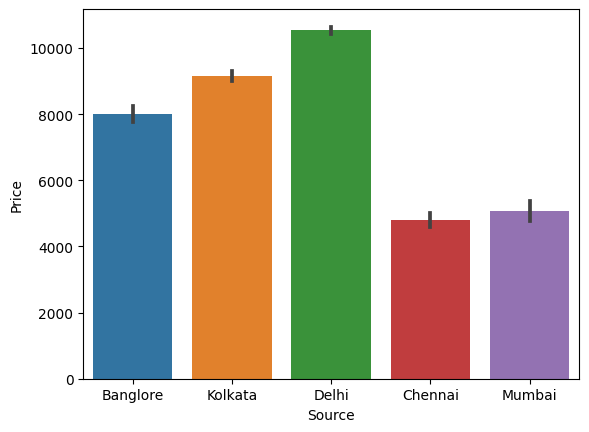

In [84]:
sns.barplot(data=flight_df,x='Source',y='Price')

- from this we can conclude that Banglore,kolkata,Delhi passangers pay more compare to chennai and mumbai

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

In [93]:
temp_df = flight_df.groupby('Month')['Price'].mean().reset_index()

In [96]:
temp_df = temp_df.rename(columns={'Price':'Average_Price'})

<Axes: xlabel='Month', ylabel='Average_Price'>

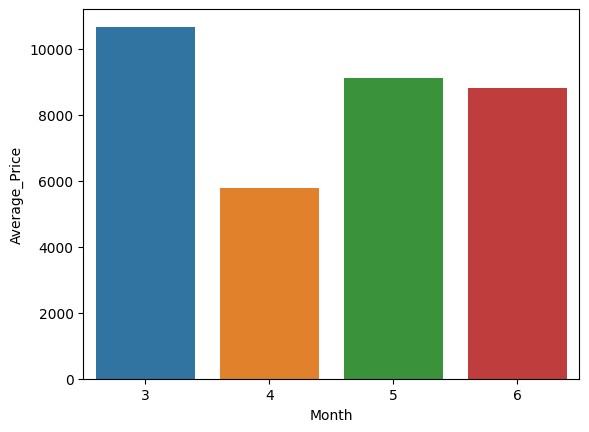

In [97]:
sns.barplot(data=temp_df,x='Month',y='Average_Price')

- from this we can conclude that month is directly affect to the price

# Google Playstore:

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [284]:
ps_df = pd.read_csv(r"D:\Study\Data Science\Datasets\googleplaystore.csv")

In [285]:
ps_df.shape

(10841, 13)

- 10841 rows adn 13 columns

### first we will do feture eniginnering

In [286]:
ps_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [287]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


remove duplicate

In [288]:
ps_df.duplicated().sum()

483

In [289]:
ps_df.drop_duplicates(inplace=True)

In [290]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

for rating we can put mode value instead of NAN 

In [291]:
ps_df['Rating'].mode()

0    4.4
Name: Rating, dtype: float64

In [292]:
ps_df['Rating']= ps_df['Rating'].fillna(4.4)

In [293]:
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [294]:
ps_df =  ps_df.dropna().reset_index(drop=True)

In [295]:
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [296]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [297]:
ps_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [298]:
ps_df['Reviews'] = ps_df['Reviews'].astype(float)

In [299]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  float64
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [300]:
ps_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [301]:
def size_format(size_str):
    if 'M' in size_str:
        size = size_str.replace('M','')
        try:
            size = float(size)
            return size * 1000
        except:
            return np.nan
    elif 'k' in size_str:
        size = size_str.replace('k','')
        try:
            size = float(size)
            return size
        except:
            return np.nan
    else:
        return np.nan

In [302]:
size_format('19M')

19000.0

In [303]:
ps_df['Size'] = ps_df['Size'].apply(size_format)

In [304]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [305]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  float64
 4   Size            8821 non-null   float64
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [306]:
ps_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [307]:
ps_df['Installs'] = ps_df['Installs'].str.replace('+','')
ps_df['Installs'] = ps_df['Installs'].str.replace(',','')
ps_df['Installs'] = ps_df['Installs'].astype(int)

C:\Users\sadar\AppData\Local\Temp\ipykernel_4944\3933934073.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ps_df['Installs'] = ps_df['Installs'].str.replace('+','')


In [308]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  float64
 4   Size            8821 non-null   float64
 5   Installs        10346 non-null  int32  
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1010.5+ KB


In [309]:
ps_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [310]:
ps_df['Type'] = ps_df['Type'].map({'Free':0,'Paid':1})

In [311]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  float64
 4   Size            8821 non-null   float64
 5   Installs        10346 non-null  int32  
 6   Type            10346 non-null  int64  
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 1010.5+ KB


In [312]:
ps_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [313]:
ps_df['Price'] = ps_df['Price'].str.replace('$','')

C:\Users\sadar\AppData\Local\Temp\ipykernel_4944\798691576.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ps_df['Price'] = ps_df['Price'].str.replace('$','')


In [314]:
ps_df['Price'] = ps_df['Price'].astype(float)

In [315]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  float64
 4   Size            8821 non-null   float64
 5   Installs        10346 non-null  int32  
 6   Type            10346 non-null  int64  
 7   Price           10346 non-null  float64
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 1010.5+ KB


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

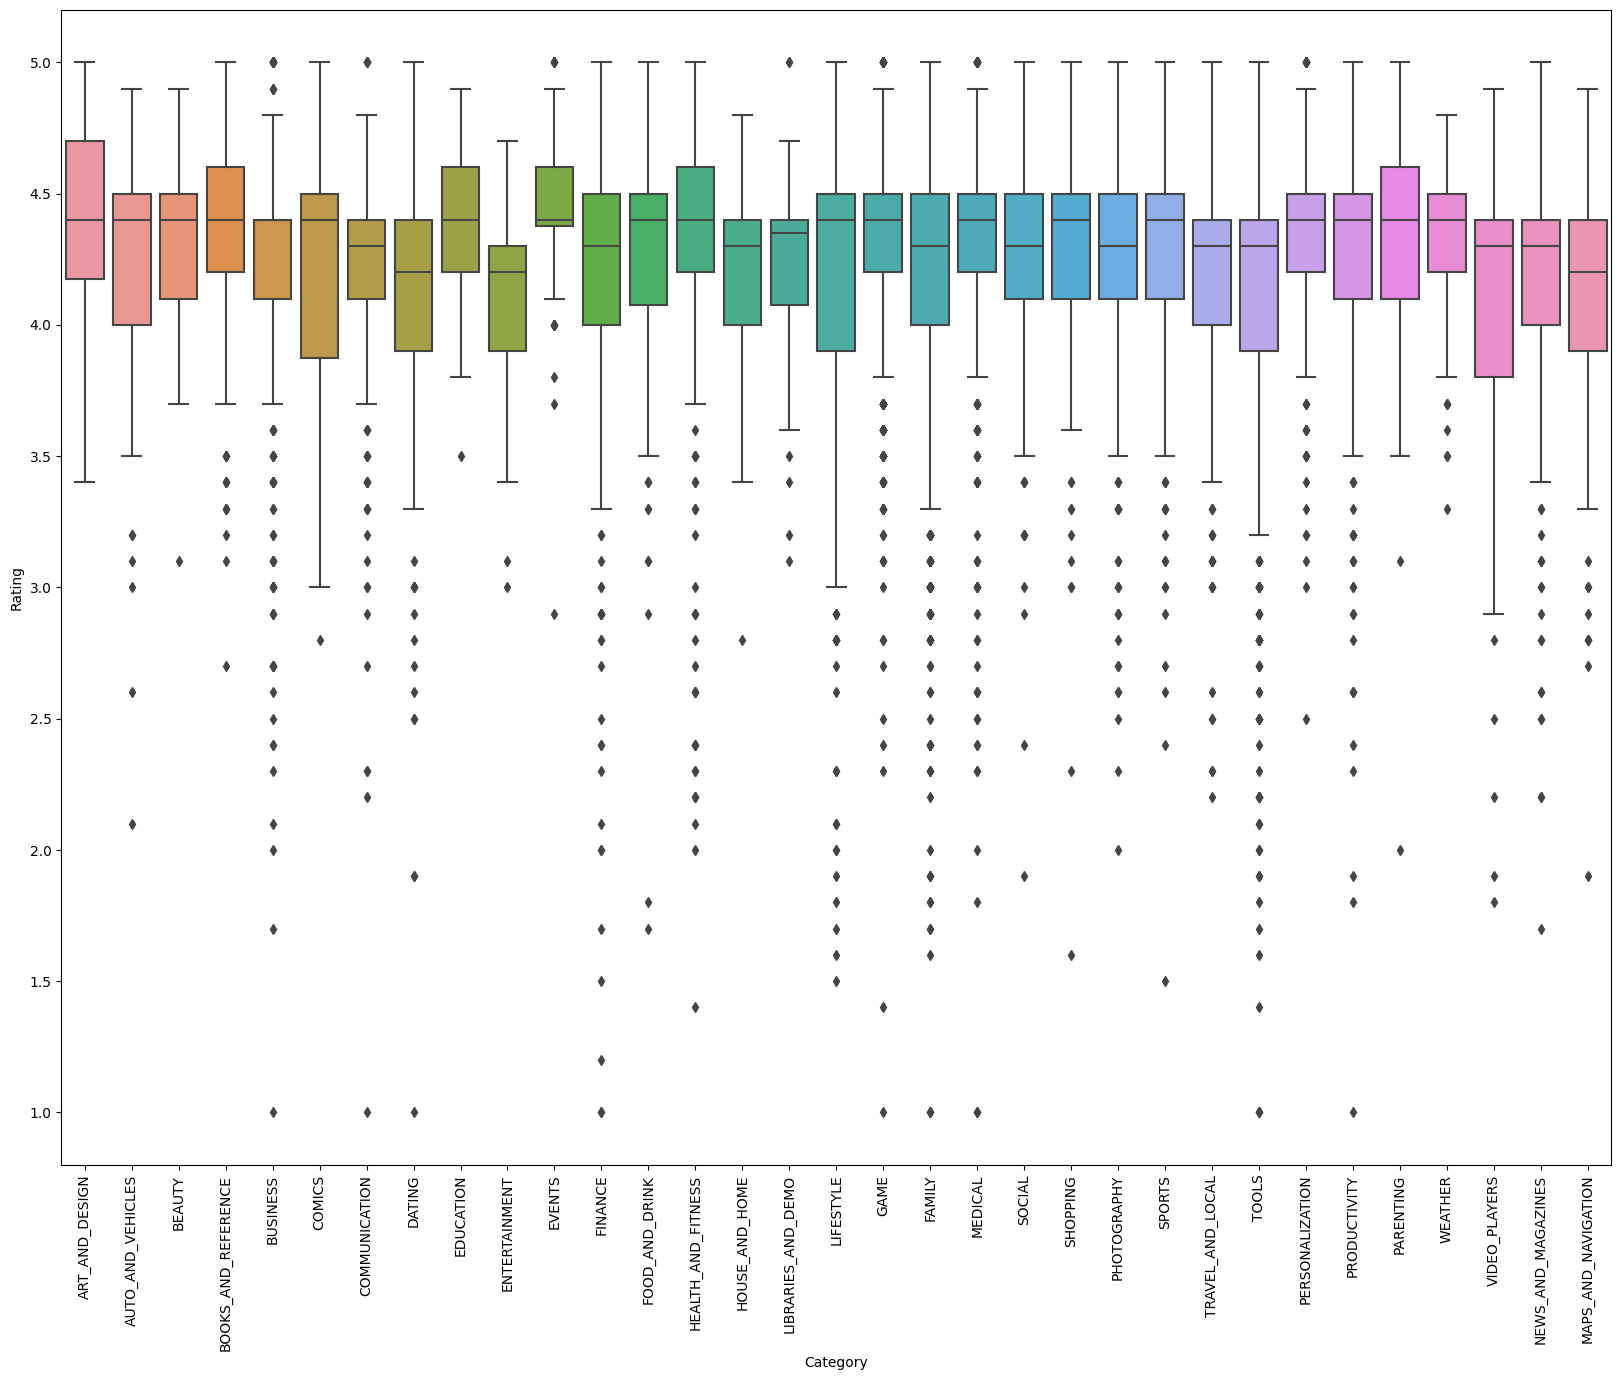

In [317]:
plt.figure(figsize=(20,15))
sns.boxplot(data=ps_df,x='Category',y='Rating')
plt.xticks(rotation='vertical')
plt.show()

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

Yes , there are missing values , we already handled it above

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

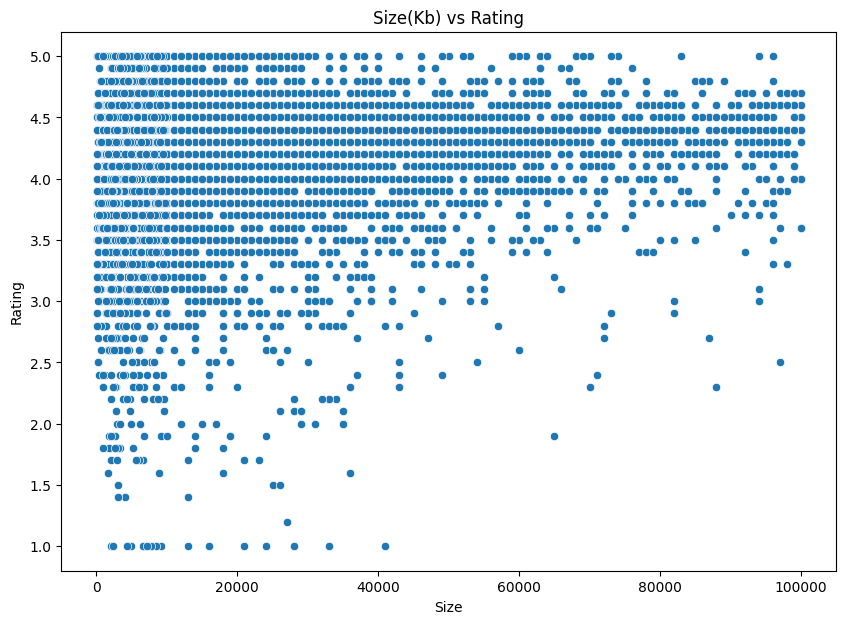

In [321]:
plt.figure(figsize=(10,7))
plt.title('Size(Kb) vs Rating')
sns.scatterplot(x=ps_df['Size'],y=ps_df['Rating'])
plt.show()

- we can conclude that apps which is vary between 0 to 20000 kb is common

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

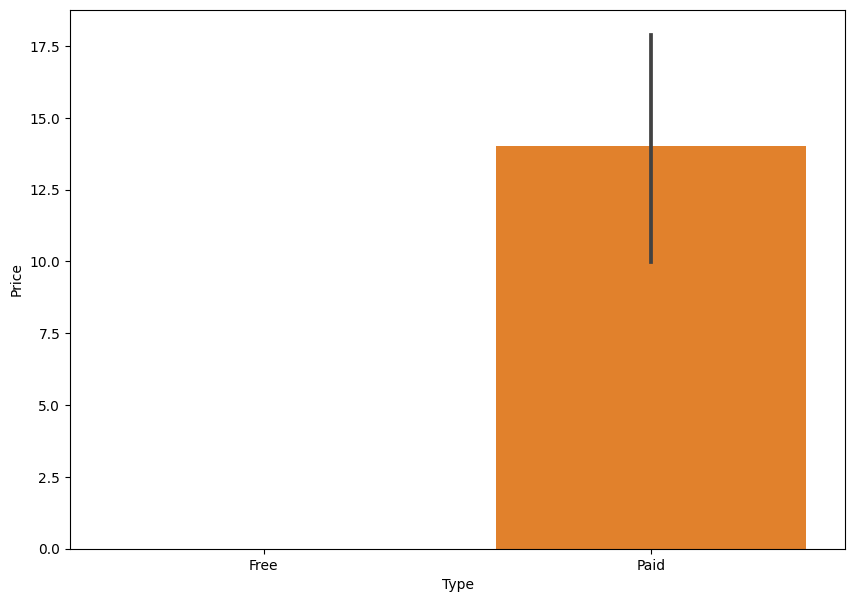

In [325]:
plt.figure(figsize=(10,7))
sns.barplot(x=ps_df['Type'],y=ps_df['Price'])
plt.xticks(ticks=[0,1],labels=['Free','Paid'])
plt.show()

- We can see that free apps has no price and paid apps has average price $14

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

- Most popular app is which get more installs

In [332]:
ps_df.sort_values('Installs',ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
302,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1000000000,0,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2254,Google+,SOCIAL,4.2,4831125.0,NaN,1000000000,0,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
2729,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689.0,NaN,1000000000,0,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
3370,Google News,NEWS_AND_MAGAZINES,3.9,877643.0,13000.0,1000000000,0,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
2805,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373.0,NaN,1000000000,0,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
2245,Instagram,SOCIAL,4.5,66577313.0,NaN,1000000000,0,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2244,Facebook,SOCIAL,4.1,78158306.0,NaN,1000000000,0,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
754,Google Play Games,ENTERTAINMENT,4.3,7165362.0,NaN,1000000000,0,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
2816,Google,TOOLS,4.4,8033493.0,NaN,1000000000,0,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
3308,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13000.0,1000000000,0,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

**Most popular category == Highest numbers of app in one category**

In [350]:
temp_df2 = ps_df.groupby('Category')[['App']].count()

In [352]:
temp_df2 = temp_df2.rename(columns={'App':'App_counts'})

In [358]:
temp_df2[temp_df2['App_counts'] == temp_df2['App_counts'].max()]

,App_counts
Category,
FAMILY,1939


- So we can conclude that FAMILY is the most popular category

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

- we dont have developers columns , so we can not answer this question

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

- If we have data when app was launched , then we can find out best time based on the rating , installs , reviews etc.